# Exploratory data analysis on Haberman dataset

## Loading the dataset

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haberman = pd.read_csv('haberman.csv')
haberman

,Age,Op_year,axil_nodes,surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


## Objective:

Perform EDA to find the best feature(s) for reasonable classification.

## High level statistics

In [5]:
#The column names in our dataset:
print(haberman.columns)

Index(['Age', 'Op_year', 'axil_nodes', 'surv_status'], dtype='object')


Observation: 'surv_status' is the class label.

In [4]:
#How many data points and features?
print(haberman.shape)

(305, 4)


Observation: The dataset has got 305 rows and 4 columns.

In [6]:
#Lets find out how many patients have lived more than 5 years and how many have not.
haberman["surv_status"].value_counts()

1    224
2     81
Name: surv_status, dtype: int64

Observation: Its an imbalanced dataset

In [5]:
#The column 'surv_status' has been treated as numerical values here
#Since it is the class label it must be treated as a categorical feature 
#lets convert 'surv_status' into categorical values
haberman['surv_status'] = haberman['surv_status'].map({1:"yes", 2:"no"})
haberman['surv_status'] = haberman['surv_status'].astype('category')
#the knowledge of this code snippet has been taken from Gokul Karthik's kernel on kaggle
#link: https://www.kaggle.com/gokulkarthik/haberman-s-survival-exploratory-data-analysis

In [6]:
print(haberman.describe())

              Age     Op_year  axil_nodes
count  305.000000  305.000000  305.000000
mean    52.531148   62.849180    4.036066
std     10.744024    3.254078    7.199370
min     30.000000   58.000000    0.000000
25%     44.000000   60.000000    0.000000
50%     52.000000   63.000000    1.000000
75%     61.000000   66.000000    4.000000
max     83.000000   69.000000   52.000000


## Bivariate Analysis

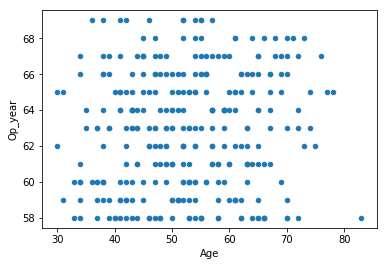

In [14]:
#Plot scatter plots
haberman.plot(kind='scatter', x='Age', y='Op_year')
plt.show()

Observation: The plot does not give any valuable information

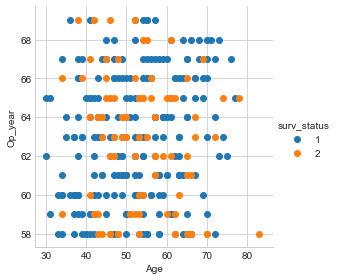

In [21]:
#Lets uniquely colour the datapoints on the basis of class label
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="surv_status", size=4) \
   .map(plt.scatter, "Age", "Op_year") \
   .add_legend();
plt.show();

Observation: Yet again we are unable to make significant classification based on the plot

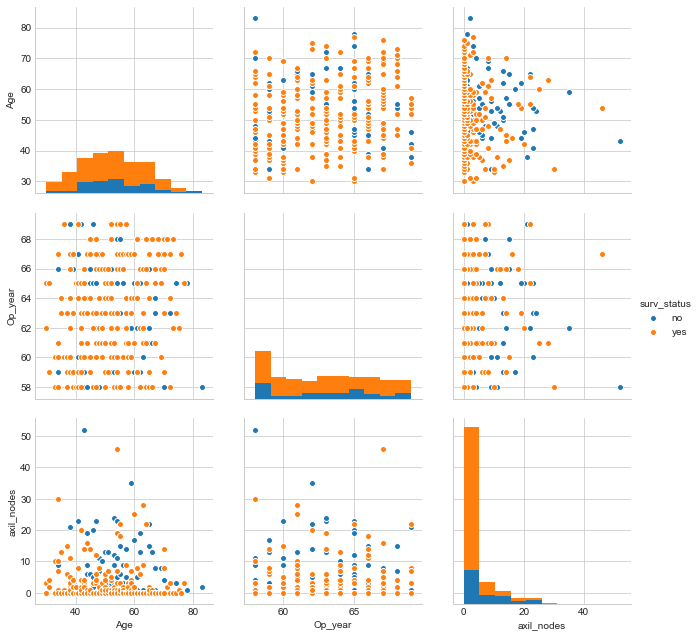

In [7]:
#Lets plot the class label on the basis of pair of all variables
#Pair plots
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="surv_status", size=3);
plt.show()

Observations:
1. The plots do not give much information to make a reasonable classification
2. However, the plot on the basis of 'Op_year' and 'axil_nodes' is somewhat reasonable
3. In the 2nd last and 3rd last plot for any 'Op_year' and 'Age' respectively if number of axil nodes is less than 9 the patient will live for more than 5 years.

## Univariate Analysis

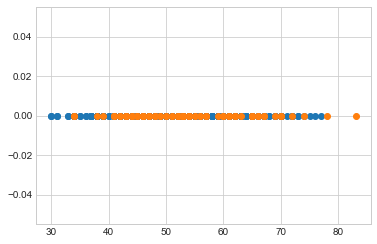

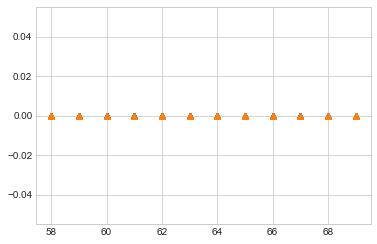

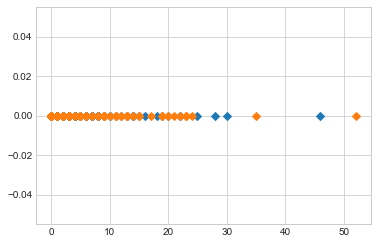

In [21]:
haberman_yes = haberman.loc[haberman["surv_status"] == "yes"];
haberman_no = haberman.loc[haberman["surv_status"] == "no"];
#print(iris_setosa["petal_length"])
plt.plot(haberman_yes["Age"], np.zeros_like(haberman_yes['Age']), 'o')
plt.plot(haberman_no["Age"], np.zeros_like(haberman_no['Age']), 'o')
plt.show()

plt.plot(haberman_yes["Op_year"], np.zeros_like(haberman_yes['Op_year']), '^')
plt.plot(haberman_no["Op_year"], np.zeros_like(haberman_no['Op_year']), '^')
plt.show()

plt.plot(haberman_yes["axil_nodes"], np.zeros_like(haberman_yes['axil_nodes']), 'D')
plt.plot(haberman_no["axil_nodes"], np.zeros_like(haberman_no['axil_nodes']), 'D')
plt.show()


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


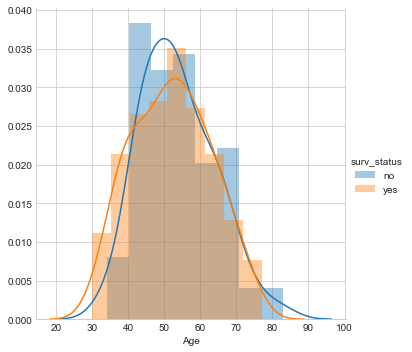

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


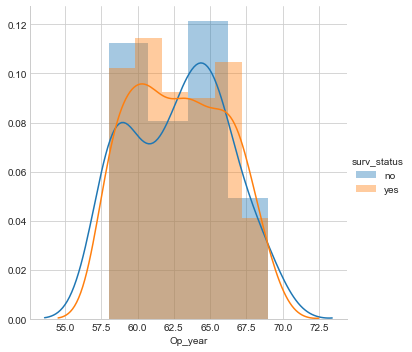

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


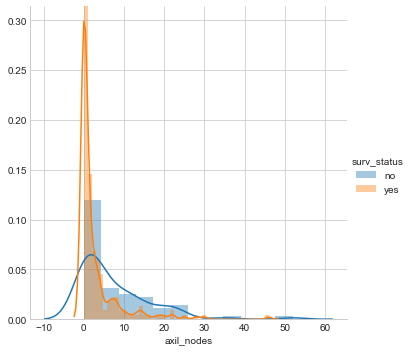

In [23]:
#Lets plot the PDF's for all the features.
#Age
sns.FacetGrid(haberman, hue="surv_status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

#Op_year
sns.FacetGrid(haberman, hue="surv_status", size=5) \
   .map(sns.distplot, "Op_year") \
   .add_legend();
plt.show();

#axil_nodes
sns.FacetGrid(haberman, hue="surv_status", size=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.show();


Observations:
1. The first and the second plots are messy.
2. If the number of axil nodes lie between 0 to 2, the probability of the patient living more than 5 years is significantly        higher.

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


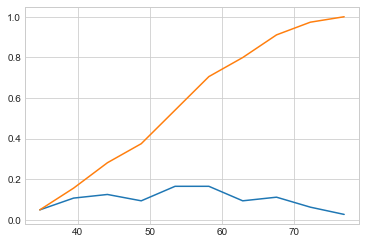

[0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


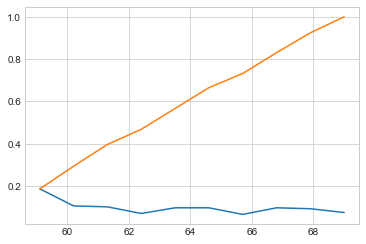

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


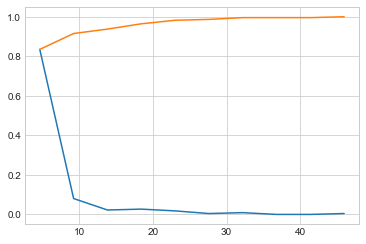

In [26]:
#Plot CDF of Age
counts, bin_edges = np.histogram(haberman_yes['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show();

#Plot CDF of Op_year
counts, bin_edges = np.histogram(haberman_yes['Op_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show();

#Plot CDF of axil_nodes
counts, bin_edges = np.histogram(haberman_yes['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show();

#### 25th, 50th and 75th percentile

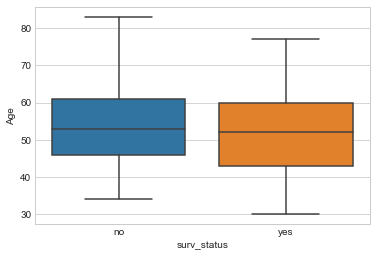

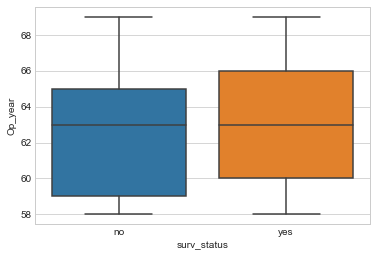

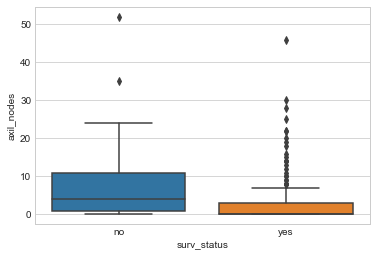

In [28]:
#Box plot and whiskers
sns.boxplot(x='surv_status',y='Age', data=haberman)
plt.show()

sns.boxplot(x='surv_status',y='Op_year', data=haberman)
plt.show()

sns.boxplot(x='surv_status',y='axil_nodes', data=haberman)
plt.show()

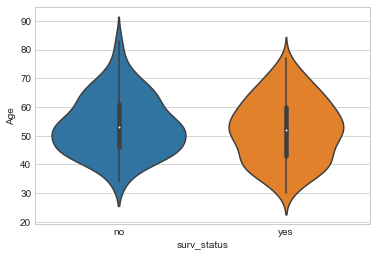

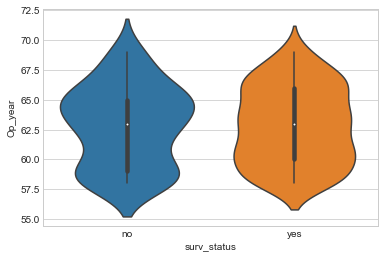

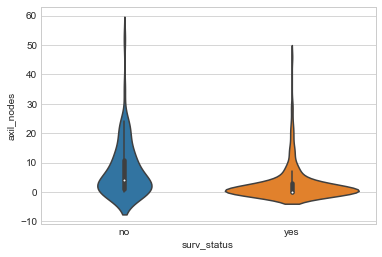

In [30]:
sns.violinplot(x="surv_status", y="Age", data=haberman, size=8)
plt.show()

sns.violinplot(x="surv_status", y="Op_year", data=haberman, size=8)
plt.show()

sns.violinplot(x="surv_status", y="axil_nodes", data=haberman, size=8)
plt.show()

Observation:
1. The box plots and violin plots on 'Age' and 'Op_year' are unable to give a reasonable classification.
2. If the number of axil nodes is more than 9, the patient won't survive more than  5 years. 

## Conclusion

EDA on the Haberman dataset shows the following things:
1. The features 'Age' and 'Op_year' are unable to surve the purpose of a reasonable classification.
2. The important feature is 'axil_nodes'. If number of axil nodes is more than 9, the patient won't live more than 5 years 